In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate random spike train

In [2]:
np.random.seed(42)
spikes = np.random.random(1000) > .99 # let's say these are 10 s
xt = np.arange(0, 10, .01)

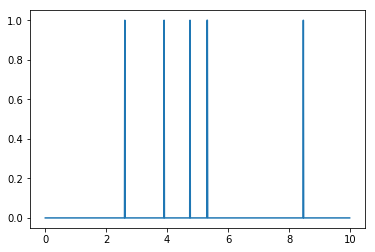

In [3]:
plt.plot(xt, spikes)

Define Ca2+ kernel with a decay constant, e.g. $\tau$ in seconds (normally 600 ms (GCaMP6f) to > 1 s (GCaMP6s) or multiple seconds (H2B-GCaMP6s).

In [4]:
def calcium_kernel(x, tau=0.6):
    """Ca2+ kernel with tau=600 ms, e.g. GCaMP6f"""
    return np.exp(-x/tau)

In [5]:
xca = np.arange(0, 3, 0.01) #  3 s long kernel
yca = calcium_kernel(xca)

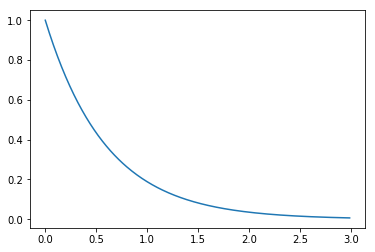

In [6]:
# Double-check that it reaches 0!
plt.plot(xca, yca)

Convolve spike train with Ca2+ kernel to gain artificial Ca2+ traces

In [7]:
conv_signal = np.convolve(spikes, yca, mode='same')

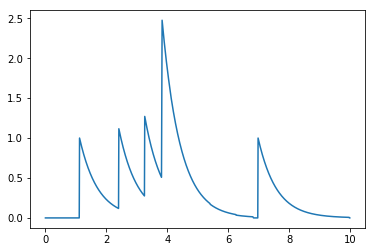

In [8]:
plt.plot(xt, conv_signal)

Do the inverse procedure (as far as one can do it)

In [9]:
from scipy.signal import deconvolve

In [10]:
reconstr, remainder = deconvolve(conv_signal, yca)

You cannot recover the whole trace, but you could e.g. zeropad your signal first

In [11]:
reconstr.shape

(701,)

Or zeropad afterwards...

In [12]:
reconstr = np.concatenate([np.zeros(yca.shape[0]//2),
                          reconstr,
                           np.zeros(yca.shape[0]//2)])[1:]

In [13]:
reconstr.shape

(1000,)

See how well they overlap

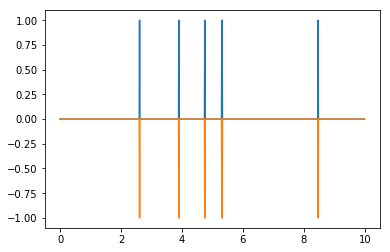

In [14]:
plt.plot(xt, spikes)
plt.plot(xt, -reconstr)

See the difference!

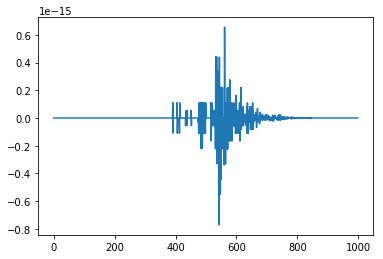

In [15]:
plt.plot(reconstr-spikes)
# 1e-15!!!

# PERFECT!